Lucas Szavara Nusp 12690087

Maria Victória Brandão Barros 12608692

https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pingouin as pg
import seaborn as sns
import scipy.stats as stats
from sklearn import datasets, svm, naive_bayes, metrics, model_selection, tree, neighbors, ensemble
from sklearn.model_selection import train_test_split
from statsmodels.miscmodels.ordinal_model import OrderedModel
plt.rcParams['figure.figsize'] = (15, 8)


In [2]:
df_reviews = pd.read_csv('./archive/olist_order_reviews_dataset.csv')
df_items = pd.read_csv('./archive/olist_order_items_dataset.csv')
df_payments = pd.read_csv('./archive/olist_order_payments_dataset.csv')
df_orders = pd.read_csv('./archive/olist_orders_dataset.csv')
df_customer = pd.read_csv('./archive/olist_customers_dataset.csv')
df_products = pd.read_csv('./archive/olist_products_dataset.csv')
df_geolocation = pd.read_csv('./archive/olist_geolocation_dataset.csv')
df_sellers = pd.read_csv('./archive/olist_sellers_dataset.csv')

## Perguntas:
### 1 – Quantas categorias de produtos foram comercializadas e quais os atributos mais relevantes?

In [ ]:
df_products['product_category_name'].nunique()

73

### 2 – Qual a categoria de produtos mais vendida?

Text(0, 0.5, 'Número de produtos')

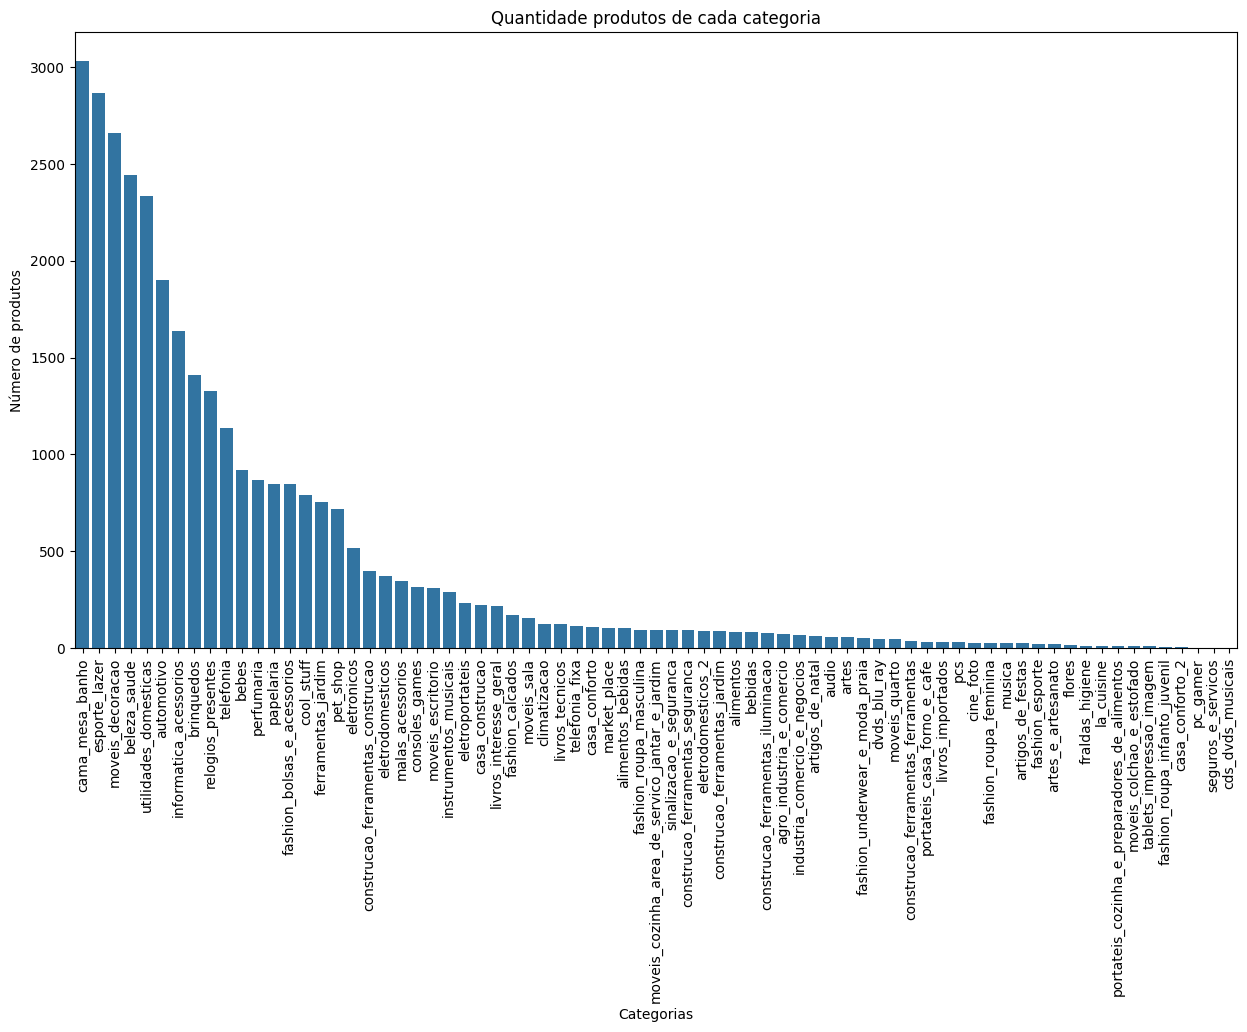

In [3]:
plt.xticks(rotation=90)
sns.countplot(df_products, x='product_category_name', order = df_products['product_category_name'].value_counts().index)
plt.title("Quantidade produtos de cada categoria")
plt.xlabel("Categorias")
plt.ylabel("Número de produtos")

In [ ]:
df_order_products = (df_orders.merge(df_items, on='order_id')
                      .merge(df_products, on='product_id'))
df_order_products['product_category_name'].value_counts(dropna=False)

product_category_name
cama_mesa_banho                  11115
beleza_saude                      9670
esporte_lazer                     8641
moveis_decoracao                  8334
informatica_acessorios            7827
                                 ...  
cds_dvds_musicais                   14
la_cuisine                          14
pc_gamer                             9
fashion_roupa_infanto_juvenil        8
seguros_e_servicos                   2
Name: count, Length: 74, dtype: int64

In [ ]:
del df_order_products

### 3 – Qual a porcentagem de compras feitas com cartão de crédito? Neste caso, qual é o número médio de parcelas?

In [4]:
plt.rcParams['figure.figsize'] = (10, 5)

In [5]:
df_order_payments = df_orders.merge(df_payments, on='order_id')
df_pay = pd.DataFrame(df_order_payments['payment_type'].value_counts()).reset_index()


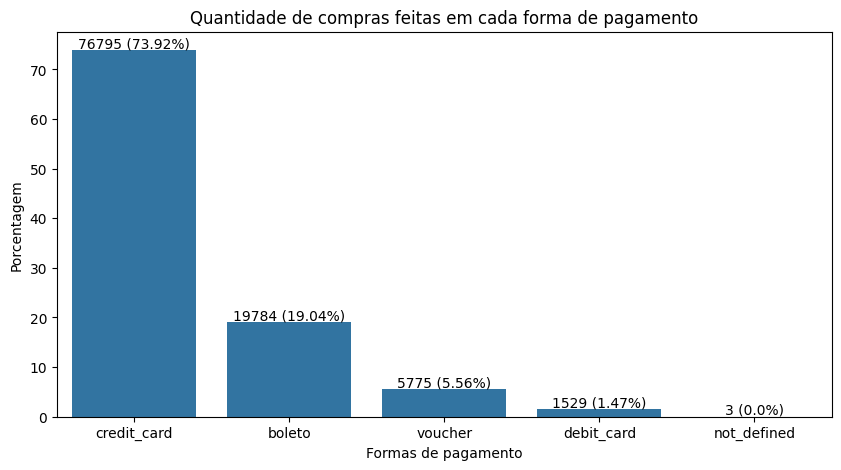

In [6]:
ax = sns.countplot(df_order_payments, x='payment_type', stat='percent', order = df_order_payments['payment_type'].value_counts().index)
i = 0
for p in ax.patches:
  height = p.get_height()
  text = (str(df_pay['payment_type'][i]) + ' (' + str(p.get_height().round(2)) + '%)')
  ax.text(p.get_x()+p.get_width()/2., height + 0.5, text, ha="center")
  i+=1
plt.title("Quantidade de compras feitas em cada forma de pagamento")
plt.xlabel("Formas de pagamento")
plt.ylabel("Porcentagem")
plt.show()

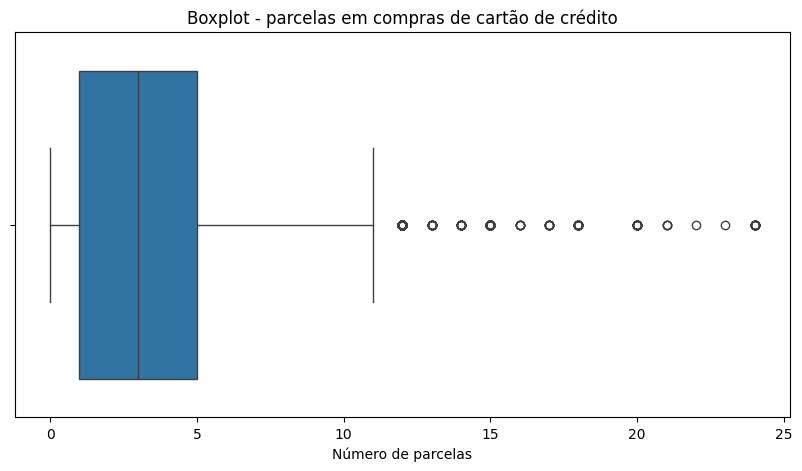

In [7]:
sns.boxplot(df_order_payments[df_order_payments['payment_type'] == 'credit_card'], x='payment_installments')
plt.title("Boxplot - parcelas em compras de cartão de crédito")
plt.xlabel("Número de parcelas")
plt.show()

In [ ]:
df_order_payments[df_order_payments['payment_type'] == 'credit_card']['payment_installments'].describe()

count    76795.000000
mean         3.507155
std          2.850990
min          0.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         24.000000
Name: payment_installments, dtype: float64

### 4 – O valor das compras fica em média em torno de qual valor em reais?

In [ ]:
df_order_payments['payment_value'].describe()

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

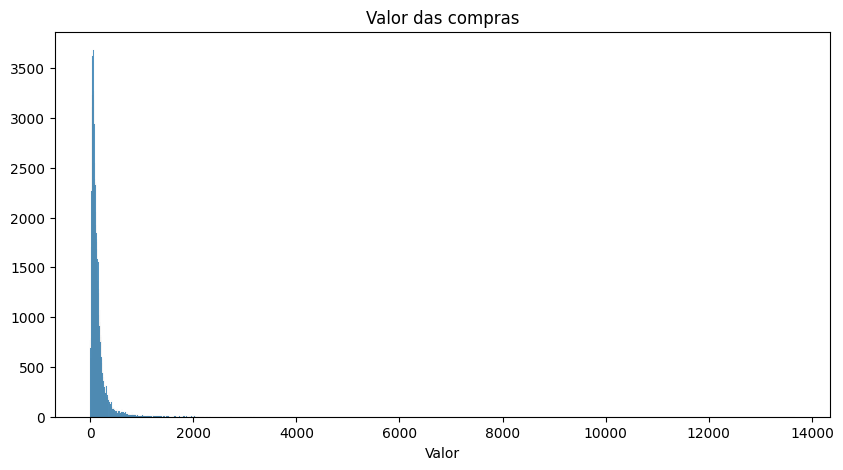

In [8]:
sns.histplot(df_order_payments, x='payment_value')
plt.title("Valor das compras")
plt.xlabel("Valor")
plt.ylabel('')
plt.show()

In [9]:
del df_order_payments

### 5 – Qual a porcentagem de clientes satisfeitos com a realização da compra (review score = 4 ou 5)

In [10]:
df_order_reviews = df_orders.merge(df_reviews, on='order_id', how='left')
df_order_reviews['review_score'] = df_order_reviews['review_score'].astype(str)
df_order_reviews.loc[df_order_reviews['review_score'] == 'nan', 'review_score'] = 'Not reviewed'
df_ord = pd.DataFrame(df_order_reviews['review_score'].value_counts()).reset_index()


In [ ]:
df_order_reviews.shape, df_orders.shape

((99992, 14), (99441, 8))

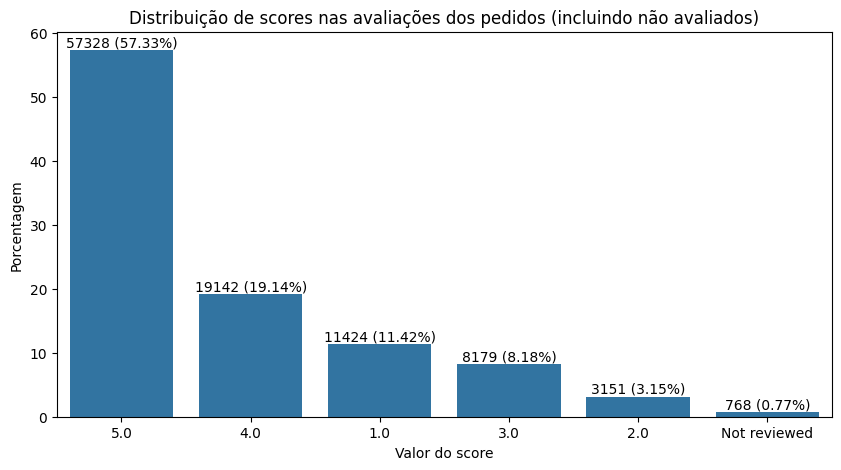

In [11]:
ax = sns.countplot(df_order_reviews.sort_values('review_score'), x='review_score', stat='percent', order = df_order_reviews['review_score'].value_counts().index)

i = 0
for p in ax.patches:
  height = p.get_height()
  text = (str(df_ord['review_score'][i]) + ' (' + str(p.get_height().round(2)) + '%)')
  ax.text(p.get_x()+p.get_width()/2., height + 0.5, text,ha="center")
  i+=1

plt.title("Distribuição de scores nas avaliações dos pedidos (incluindo não avaliados)")
plt.xlabel("Valor do score")
plt.ylabel('Porcentagem')
plt.show()

In [13]:
df_rev = pd.DataFrame(df_reviews['review_score'].value_counts()).reset_index()

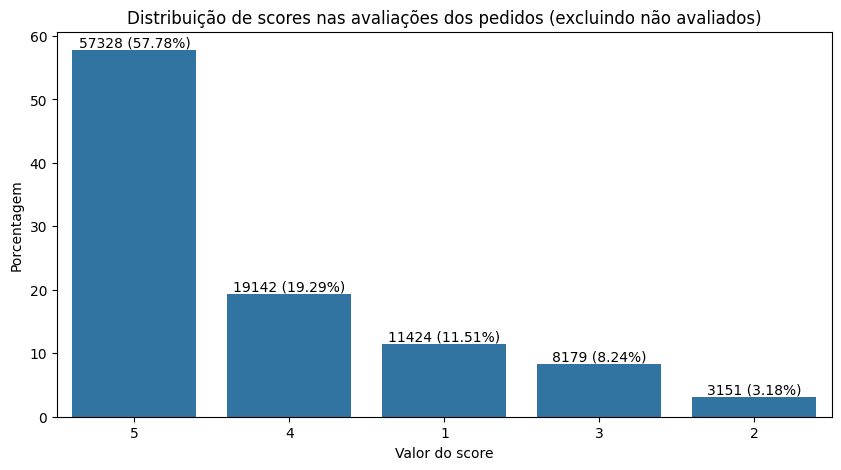

In [14]:
ax = sns.countplot(df_reviews.sort_values('review_score'), x='review_score', stat='percent', order = df_reviews['review_score'].value_counts().index)

i = 0
for p in ax.patches:
  height = p.get_height()
  text = (str(df_rev['review_score'][i]) + ' (' + str(p.get_height().round(2)) + '%)')
  ax.text(p.get_x()+p.get_width()/2., height + 0.5, text,ha="center")
  i+=1

plt.title("Distribuição de scores nas avaliações dos pedidos (excluindo não avaliados)")
plt.xlabel("Valor do score")
plt.ylabel('Porcentagem')
plt.show()

### 6 – Existe relação entre o tempo de entrega e avaliação feita pelo cliente?


<Axes: xlabel='None', ylabel='review_score'>

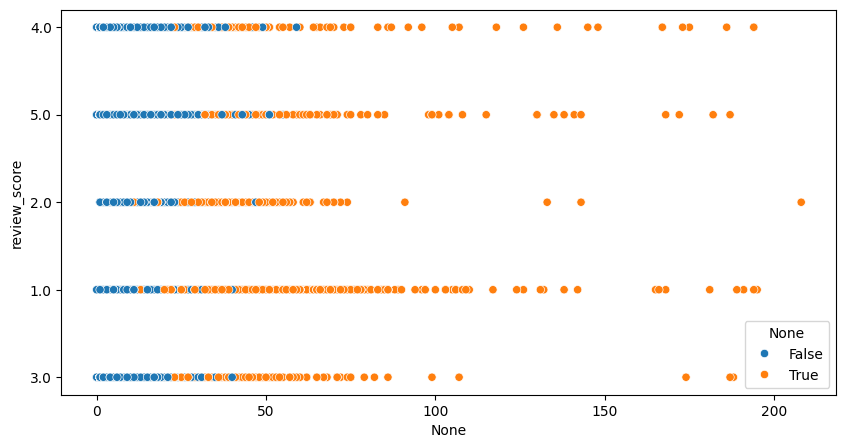

In [ ]:
sns.scatterplot(x=((pd.to_datetime(df_order_reviews['order_delivered_customer_date']) - pd.to_datetime(df_order_reviews['order_purchase_timestamp']))).dt.days[df_order_reviews['review_score'] != 'Not reviewed'] , y=df_order_reviews['review_score'][df_order_reviews['review_score'] != 'Not reviewed'], hue=pd.to_datetime(df_order_reviews['order_delivered_customer_date'])[df_order_reviews['review_score'] != 'Not reviewed'] > pd.to_datetime(df_order_reviews['order_estimated_delivery_date'])[df_order_reviews['review_score'] != 'Not reviewed'])

<Axes: xlabel='None', ylabel='review_score'>

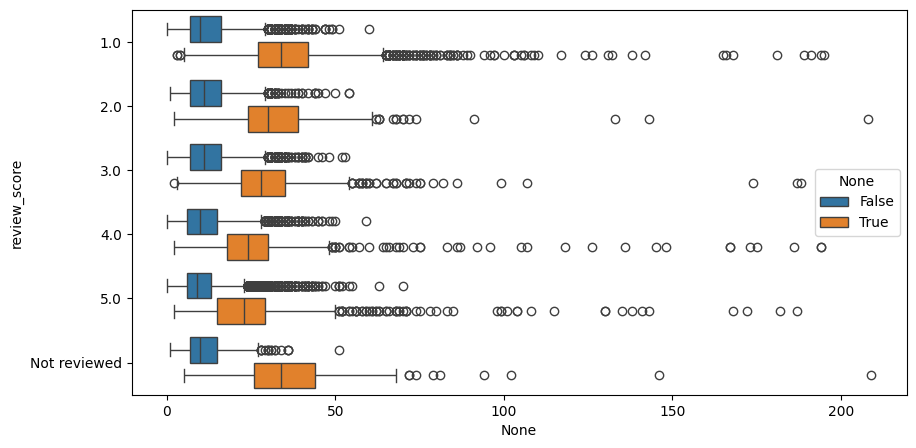

In [ ]:
sns.boxplot(x=((pd.to_datetime(df_order_reviews.sort_values('review_score')['order_delivered_customer_date']) - pd.to_datetime(df_order_reviews.sort_values('review_score')['order_purchase_timestamp']))).dt.days, y=df_order_reviews.sort_values('review_score')['review_score'], orient='h', hue=pd.to_datetime(df_order_reviews.sort_values('review_score')['order_delivered_customer_date']) > pd.to_datetime(df_order_reviews.sort_values('review_score')['order_estimated_delivery_date']))

Text(0, 0.5, 'Porcentagem')

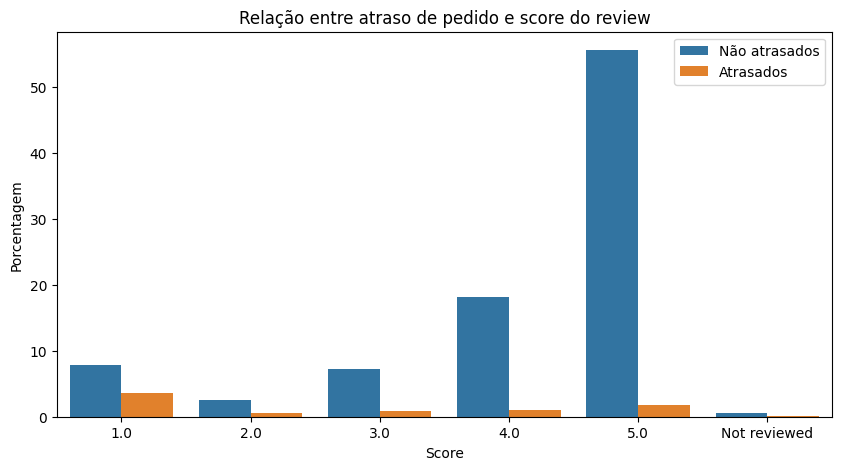

In [15]:
sns.countplot(df_order_reviews.sort_values('review_score'), x='review_score', stat='percent', hue=pd.to_datetime(df_order_reviews.sort_values('review_score')['order_delivered_customer_date']) > pd.to_datetime(df_order_reviews.sort_values('review_score')['order_estimated_delivery_date']))
plt.legend(labels=['Não atrasados', 'Atrasados'])
plt.title('Relação entre atraso de pedido e score do review')
plt.xlabel('Score')
plt.ylabel('Porcentagem')

### 7 – Quais estados do Brasil que possuem mais clientes insatisfeitos?

In [16]:
df_geo_reviews = (df_reviews.merge(df_orders, on='order_id'))
df_geo_reviews = df_geo_reviews.merge(df_customer, on='customer_id')
df_geo_reviews_low = df_geo_reviews[df_geo_reviews.review_score < 4]
df_geo_reviews_low['customer_state'].value_counts()

SP    8564
RJ    3697
MG    2515
RS    1181
PR    1010
BA     971
SC     853
DF     493
GO     491
ES     482
PE     405
CE     395
PA     286
MA     236
MT     202
MS     158
PB     136
PI     132
AL     128
RN     107
SE     105
RO      66
TO      61
AM      28
AC      21
RR      18
AP      13
Name: customer_state, dtype: int64

In [17]:
df = pd.DataFrame(df_geo_reviews_low['customer_state'].value_counts()).reset_index()
df = df[df['customer_state'] > 1000]
df

index  customer_state
0    SP            8564
1    RJ            3697
2    MG            2515
3    RS            1181
4    PR            1010

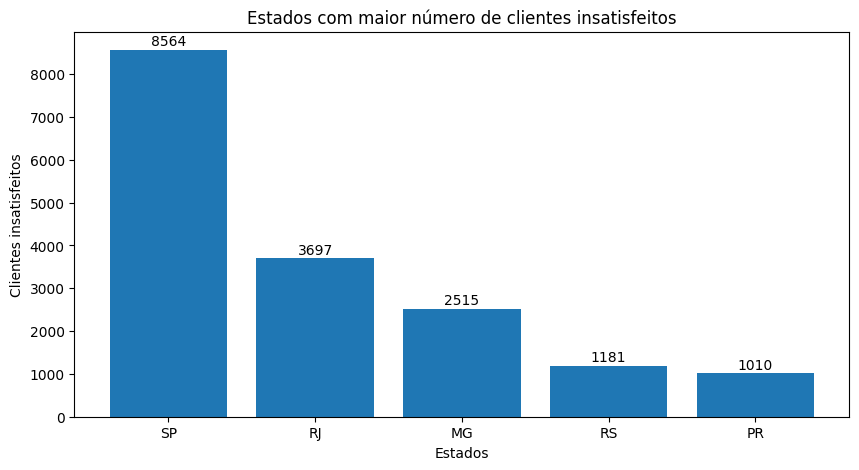

In [18]:
ax = plt.bar(df['index'], df['customer_state'])

i = 0
for p in ax:
    width = p.get_width()
    height = p.get_height()
    text = (str(df['customer_state'][i]))
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height+100,
             text,
             ha='center')
    i+=1


plt.xlabel("Estados")
plt.ylabel("Clientes insatisfeitos")
plt.title("Estados com maior número de clientes insatisfeitos")
plt.show()

<Axes: xlabel='customer_state', ylabel='review_score'>

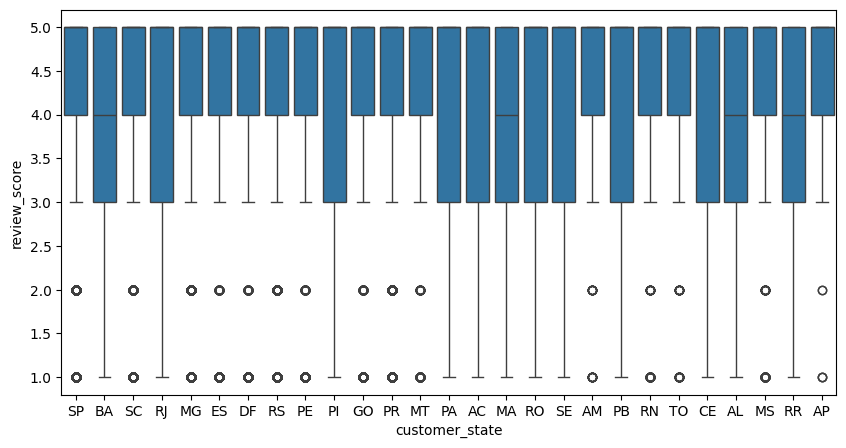

In [ ]:
sns.boxplot(df_geo_reviews, x='customer_state', y='review_score')

In [19]:
df2 = pd.DataFrame(((df_geo_reviews_low['customer_state'].value_counts())/(df_geo_reviews['customer_state'].value_counts())) *100)
df2 = df2.sort_values(by=['customer_state'], ascending=False).reset_index()
df2

index  customer_state
0     RR       39.130435
1     MA       31.635389
2     AL       30.917874
3     SE       30.085960
4     CE       29.721595
5     PA       29.545455
6     RJ       28.962005
7     BA       28.924635
8     PI       26.883910
9     RO       26.190476
10    AC       25.925926
11    PB       25.612053
12    PE       24.605103
13    GO       24.258893
14    ES       23.908730
15    SC       23.544024
16    DF       22.951583
17    MT       22.369878
18    RN       22.199170
19    TO       21.863799
20    MS       21.823204
21    MG       21.634409
22    RS       21.539303
23    SP       20.542096
24    PR       20.047638
25    AP       19.402985
26    AM       19.047619

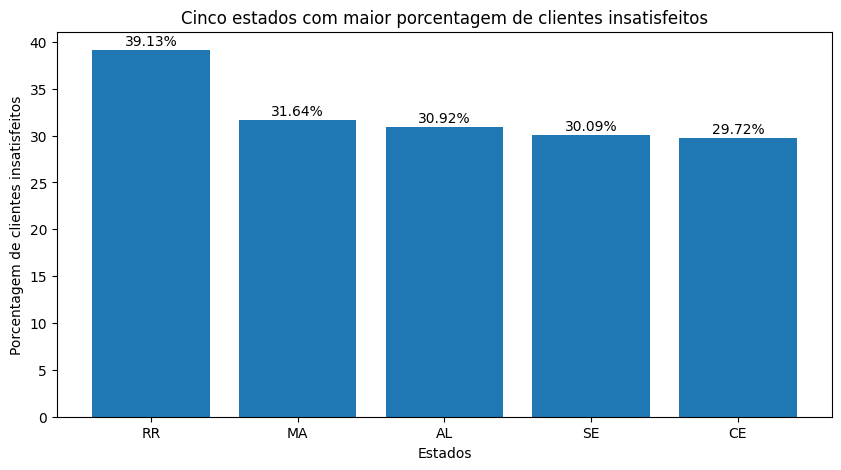

<Figure size 800x600 with 0 Axes>

In [20]:
df2 = df2[df2['customer_state'] > 29.72]
ax = plt.bar(df2['index'], df2['customer_state'])

i = 0
for p in ax:
    width = p.get_width()
    height = p.get_height()
    text = (str(round(df2['customer_state'][i],2)) + "%")
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height+0.5,
             text,
             ha='center')
    i+=1


plt.xlabel("Estados")
plt.ylabel("Porcentagem de clientes insatisfeitos")
plt.title("Cinco estados com maior porcentagem de clientes insatisfeitos")
plt.figure(figsize=(8,6))
plt.show()

### Média do preço do pedido por categoria de produtos vendidos

In [21]:
df_item_order = df_items.merge(df_products, on='product_id')
categorias_mais_vendidas = pd.DataFrame(df_item_order['product_category_name'].value_counts())
categorias_mais_vendidas = categorias_mais_vendidas[categorias_mais_vendidas['product_category_name'] > 7800]
categorias_mais_vendidas

product_category_name
cama_mesa_banho                         11115
beleza_saude                             9670
esporte_lazer                            8641
moveis_decoracao                         8334
informatica_acessorios                   7827

In [22]:
lista_valores = []
for i in categorias_mais_vendidas.index.to_list():
  media = round(df_item_order[df_item_order['product_category_name'] == i]['price'].mean(),2)
  lista_valores.append(media)
  print(i, media)

cama_mesa_banho 93.3
beleza_saude 130.16
esporte_lazer 114.34
moveis_decoracao 87.56
informatica_acessorios 116.51


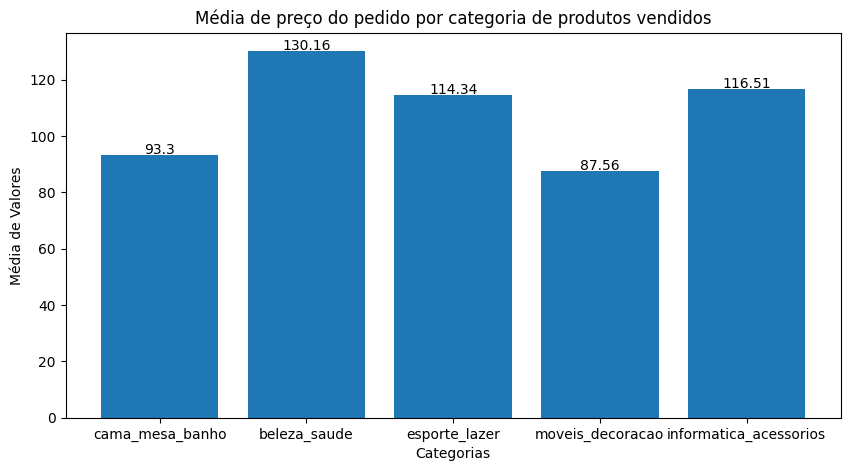

In [23]:
ax = plt.bar(categorias_mais_vendidas.index.to_list(), lista_valores)

i = 0
for p in ax:
    width = p.get_width()
    height = p.get_height()
    text = (str(lista_valores[i]))
    x, y = p.get_xy()
    plt.text(x+width/2,
             y+height+0.5,
             text,
             ha='center')
    i+=1


plt.xlabel("Categorias")
plt.ylabel("Média de Valores")
plt.title("Média de preço do pedido por categoria de produtos vendidos")
plt.show()

# Ajuste dos modelos:
## Tratamento das covariáveis

In [ ]:
df_payments = pd.get_dummies(df_payments, columns=['payment_type'])
df_products = pd.get_dummies(df_products, columns=['product_category_name'])

In [ ]:
df_items['total_price'] = df_items['price'] * df_items['order_item_id']
df_items['total_freight'] = df_items['freight_value'] * df_items['order_item_id']
df_sellers_customers = (df_orders.merge(df_customer, on='customer_id', validate='many_to_one')
                                 .merge(df_items, on='order_id', validate='one_to_many')
                                 .merge(df_sellers, on='seller_id', validate='many_to_one')
                                 .merge(df_products, on='product_id', validate='many_to_one')
                       )
df_sellers_customers['same_state'] = df_sellers_customers['customer_state'] == df_sellers_customers['seller_state']
df_sellers_customers.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date                customer_unique_id  \
0           2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
1           2018-08-13 00:00:00  af07308b275d755c9edb36a90c618231   
2           2018-09-04 00:00:00  3a653a41f6f9fc3d2a113cf8398680e8   
3           2017-12-15 00:00:00  7c142cf63193a1473d2e66489a9ae977   
4           2018-02-26 00:00:00  72632f0f9dd73dfee390c9b22eb56dd6   

   customer_zip_code_prefix  ...  \
0                      3149  ...   
1                     47813  ...   
2                     75265  ...   
3                     59296  ...   
4                      9195  ...   

  product_category_name_portateis_casa_forno_e_cafe  \
0                                             False   
1                                             False   
2                                             False   
3                                             False   
4                                             False   

  product_category_name_portateis_cozinha_e_preparadores_de_alimentos  \
0                                              False                    
1                                              False                    
2                                              False                    
3                                              False                    
4                                              False                    

   product_category_name_relogios_presentes  \
0                                     False   
1                                     False   
2                                     False   
3                                     False   
4                                     False   

  product_category_name_seguros_e_servicos  \
0                                    False   
1                                    False   
2                                    False   
3                                    False   
4                                    False   

  product_category_name_sinalizacao_e_seguranca  \
0                                         False   
1                                         False   
2                                         False   
3                                         False   
4                                         False   

  product_category_name_tablets_impressao_imagem  \
0                                          False   
1                                          False   
2                                          False   
3                                          False   
4                                          False   

   product_category_name_telefonia  product_category_name_telefonia_fixa  \
0                            False                                 False   
1                            False                                 False   
2       

In [ ]:
df_payments_unique = df_payments.groupby('order_id').agg({
    'payment_sequential': 'count',
    'payment_value': 'sum',
    'payment_type_boleto': 'mean',
    'payment_type_credit_card': 'mean',
    'payment_type_debit_card': 'mean',
    'payment_type_not_defined': 'mean',
    'payment_type_voucher': 'mean',
    'payment_installments': 'mean'
}).reset_index()
df_sellers_unique = df_sellers_customers.groupby('order_id').agg(dict({
    'product_id': 'nunique',
    'seller_id': 'nunique',
    'same_state': 'mean',
    'total_price': 'mean',
    'total_freight': 'mean'
}, **{
    nome: 'mean' for nome in df_sellers_customers.columns if 'product' in nome and nome != 'product_id'
})).reset_index()
df_reg = (df_reviews.merge(df_orders, on='order_id', validate='many_to_one')
                    .merge(df_customer, on='customer_id', validate='many_to_one')
                    .merge(df_payments_unique, on='order_id', validate='many_to_one')
                    .merge(df_sellers_unique, on='order_id', validate='many_to_one')
         )
df_reg.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp                       customer_id order_status  \
0     2018-01-18 21:46:59  41dcb106f807e993532d446263290104    delivered   
1     2018-03-11 03:05:13  8a2e7ef9053dea531e4dc76bd6d853e6    delivered   
2     2018-02-18 14:36:24  e226dfed6544df5b7b87a48208690feb    delivered   
3     2017-04-21 22:02:06  de6dff97e5f1ba84a3cd9a3bc97df5f6    delivered   
4     2018-03-02 10:26:53  5986b333ca0d44534a156a52a8e33a83    delivered   

  order_purchase_timestamp  ... product_category_name_pet_shop  \
0      2018-01-11 15:30:49  ...                            0.0   
1      2018-02-28 12:25:19  ...                            0.0   
2      2018-02-03 09:56:22  ...                            0.0   
3      2017-04-09 17:41:13  ...                            0.0   
4      2018-02-10 10:59:03  ...                            0.0   

  product_category_name_portateis_casa_forno_e_cafe  \
0                                               0.0   
1                                               0.0   
2                                               0.0   
3                                               0.0   
4                                               0.0   

  product_category_name_portateis_cozinha_e_preparadores_de_alimentos  \
0                                                0.0                    
1                                                0.0                    
2                                                0.0                    
3                                                0.0                    
4                                                0.0                    

  product_category_name_relogios_presentes  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

  product_category_name_seguros_e_servicos  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   

   product_category_name_sinalizacao_e_seguranca  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

  product_category_name_tablets_impressao_imagem  \
0                                            0.0   
1                                            0.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   

  product_category_name_telefonia  product_category_name_telefonia_fixa  \
0   

In [ ]:
df_reg.columns.values

array(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'payment_sequential', 'payment_value', 'payment_type_boleto',
       'payment_type_credit_card', 'payment_type_debit_card',
       'payment_type_not_defined', 'payment_type_voucher',
       'payment_installments', 'product_id', 'seller_id', 'same_state',
       'total_price', 'total_freight', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm',
       'product_category_name_agro_industria_e_comercio',
       'p

In [ ]:
del df_reg['review_id'], df_reg['order_id'], df_reg['review_comment_title'], df_reg['review_comment_message'], df_reg['review_creation_date']
del df_reg['review_answer_timestamp'], df_reg['customer_id'], df_reg['order_approved_at'], df_reg['order_delivered_carrier_date']
del df_reg['customer_unique_id'], df_reg['customer_zip_code_prefix'], df_reg['customer_city']

In [ ]:
df_reg['delayed_order'] = pd.to_datetime(df_reg['order_estimated_delivery_date']) < pd.to_datetime(df_reg['order_delivered_customer_date'])
df_reg['delayed_days'] = (pd.to_datetime(df_reg['order_estimated_delivery_date']) - pd.to_datetime(df_reg['order_delivered_customer_date'])).dt.days
df_reg.loc[df_reg['delayed_days'] < 0, 'delayed_days'] = 0
df_reg['delivery_time'] = (pd.to_datetime(df_reg['order_delivered_customer_date']) - pd.to_datetime(df_reg['order_purchase_timestamp'])).dt.days
df_reg['delivery_interaction'] = df_reg['delayed_order'] * df_reg['delivery_time']
df_reg['installment_value'] = df_reg['payment_value'] / df_reg['payment_installments']
df_reg.loc[df_reg['payment_installments'] == 0, 'installment_value'] = df_reg['payment_value'][df_reg['payment_installments'] == 0]
df_reg['cancelado'] = df_reg['order_status'] == 'canceled'
del df_reg['order_delivered_customer_date'], df_reg['order_status'], df_reg['order_estimated_delivery_date'], df_reg['order_purchase_timestamp']
df_reg = df_reg.dropna()
df_reg = pd.get_dummies(df_reg, columns=['customer_state'])
df_reg_train, df_reg_test = train_test_split(df_reg, test_size=0.1)
df_reg_train.shape

(85522, 127)

In [ ]:
pd.set_option('display.max_columns',504)
df_reg_train.describe()

review_score  payment_sequential  payment_value  payment_type_boleto  \
count  85522.000000        85522.000000   85522.000000         85522.000000   
mean       4.157679            1.044223     159.572037             0.198756   
std        1.283116            0.366713     216.487454             0.399066   
min        1.000000            1.000000       9.590000             0.000000   
25%        4.000000            1.000000      62.000000             0.000000   
50%        5.000000            1.000000     105.010000             0.000000   
75%        5.000000            1.000000     176.590000             0.000000   
max        5.000000           22.000000   13664.080000             1.000000   

       payment_type_credit_card  payment_type_debit_card  \
count              85522.000000             85522.000000   
mean                   0.758129                 0.015376   
std                    0.421907                 0.123044   
min                    0.000000                 0.000000   
25%                    0.500000                 0.000000   
50%                    1.000000                 0.000000   
75%                    1.000000                 0.000000   
max                    1.000000                 1.000000   

       payment_type_not_defined  payment_type_voucher  payment_installments  \
count                   85522.0          85522.000000          85522.000000   
mean                        0.0              0.027739              2.913241   
std                         0.0              0.146981              2.696494   
min                         0.0              0.000000              0.000000   
25%                         0.0              0.000000              1.000000   
50%                         0.0              0.000000              2.000000   
75%                         0.0              0.000000              4.000000   
max                         0.0              1.000000             24.000000   

         product_id     seller_id    same_state   total_price  total_freight  \
count  85522.000000  85522.000000  85522.000000  85522.000000   85522.000000   
mean       1.038750      1.013961      0.359724    130.830951      21.491757   
std        0.227842      0.124111      0.479295    193.477697      17.761463   
min        1.000000      1.000000      0.000000      0.850000       0.000000   
25%        1.000000      1.000000      0.000000     45.000000      13.670000   
50%        1.000000      1.000000      0.000000     82.000000      17.060000   
75%        1.000000      1.000000      1.000000    146.990000      23.080000   
max        8.000000      5.000000      1.000000   7560.000000    1047.060000   

       product_name_lenght  product_description_lenght  product_photos_qty  \
count         85522.000000                85522.000000        85522.000000   
mean             48.870271                  792.150914            2.248688   
std               9.951641                  651.219561            1.737791   
min               5.000000                    4.000000            1.000000   
25%              43.000000                  351.000000            1.000000   
50%              52.000000                  606.000000            2.000000   
75%              57.000000                  995.000000            3.000000   
max              72.000000                 3992.000000           20.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      85522.000000       85522.000000       85522.000000   
mean        2097.142935          30.108422          16.446137   
std         3743.873358          16.064317          13.249087   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1813.000000          38.000000          20.000000   
max        40425.000000         105.000000         105.000000   

       product_width_cm  product

In [ ]:
q,r = np.linalg.qr(np.asarray(df_reg_train.loc[:, df_reg_train.columns != 'review_score'], dtype='float'))

df_reg_train = df_reg_train.iloc[:, np.insert(np.abs(np.diag(r))>=1e-8, 0, True)]
np.insert(np.abs(np.diag(r))>=1e-8, 0, True)

In [ ]:
df_reg_train.shape

(85522, 125)

In [ ]:
payment_type = [
    i for i in df_reg_train.columns if 'payment_type' in i
]
payment_type.pop()


product_category_name = [
    i for i in df_reg_train.columns if 'product_category_name' in i
]
product_category_name.pop()


customer_state = [
    i for i in df_reg_train.columns if 'customer_state' in i
]
customer_state.pop()

covariaveis_unicas = [
    'payment_sequential',
    'payment_installments',
    'payment_value',
    'delayed_order',
    'delivery_interaction',
    'delivery_time',
    'delayed_days',
    'installment_value',
    'cancelado',
    'product_id',
    'seller_id',
    'same_state',
    'product_name_lenght',
    'product_description_lenght',
    'product_photos_qty',
    'product_weight_g',
    'product_length_cm',
    'product_height_cm',
    'product_width_cm',
    'total_price',
    'total_freight'
]
covariaveis = covariaveis_unicas + payment_type + product_category_name + customer_state

## Regressão ordinal logistica

In [ ]:
modf_logit = OrderedModel(df_reg_train['review_score'], df_reg_train[covariaveis].astype(float),
                                      distr='logit')
resf_logit = modf_logit.fit(method='bfgs')
resf_logit.summary()

/home/lucas/.cache/pypoetry/virtualenvs/ecommerce-classification-xG4A-NiM-py3.10/lib/python3.10/site-packages/scipy/optimize/_optimize.py:1397: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)


         Current function value: 1.094213
         Iterations: 500
         Function evaluations: 509
         Gradient evaluations: 509


/home/lucas/.cache/pypoetry/virtualenvs/ecommerce-classification-xG4A-NiM-py3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:           review_score   Log-Likelihood:                -93579.
Model:                   OrderedModel   AIC:                         1.874e+05
Method:            Maximum Likelihood   BIC:                         1.886e+05
Date:                Tue, 02 Apr 2024                                         
Time:                        02:01:26                                         
No. Observations:               85522                                         
Df Residuals:                   85397                                         
Df Model:                         121                                         
========================================================================================================================================
                                                                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
payment_sequential                                                       0.0148      0.022      0.662      0.508      -0.029       0.058
payment_installments                                                     0.0039      0.004      1.085      0.278      -0.003       0.011
payment_value                                                           -0.0036      0.000    -14.676      0.000      -0.004      -0.003
delayed_order                                                           -1.0429      0.065    -16.119      0.000      -1.170      -0.916
delivery_interaction                                                    -0.0116      0.002     -4.934      0.000      -0.016      -0.007
delivery_time                                                           -0.0498      0.001    -33.570      0.000      -0.053      -0.047
delayed_days                                                             0.0022      0.001      1.995      0.046    3.85e-05       0.004
installment_value                                                        0.0001   9.39e-05      1.306      0.191   -6.14e-05       0.000
cancelado                                                               -5.0389      1.922     -2.622      0.009      -8.806      -1.272
product_id                                                              -0.2745      0.040     -6.914      0.000      -0.352      -0.197
seller_id                                                               -1.3501      0.069    -19.651      0.000      -1.485      -1.215
same_state                                                              -0.0173      0.023     -0.763      0.445      -0.062       0.027
product_name_lenght                                                     -0.0035      0.001     -4.740      0.000      -0.005      -0.002
product_description_lenght                                            7.811e-06   1.18e-05      0.659      0.510   -1.54e-05     3.1e-05
product_photos_qty                                                      -0.0087      0.004     -2.032      0.042      -0.017      -0.000
product_weight_g                                                      -7.52e-07   3.12e-06     -0.241      0.810   -6.87e-06    5.36e-06
product_length_cm                                                    -7.337e-06      0.001     -0.013      0.990      -0.001       0.001
product_height_cm                                                       -0.0007      0.001     -0.969      0.332      -0.002       0.001
product_width_cm                                                         0.0004      0.001      0.461      0.645      -0.001       0.002
total_price                                                              0.0037      0.000     15.032      0.000       0.003       0.004
total_freig

In [ ]:
modf_logit.transform_threshold_params(resf_logit.params[-4:])


array([       -inf, -4.7793653 , -4.4080766 , -3.69273392, -2.62656841,
               inf])

In [ ]:
def amostra_dist_truncada(dist, a, b, loc, scale):
  u = np.random.uniform()
  return dist.ppf(
      u * (dist.cdf(b, loc=loc, scale=scale) - dist.cdf(a, loc=loc, scale=scale)) +
      dist.cdf(a, loc=loc, scale=scale),
      loc=loc, scale=scale
      )


def residuo_substituto(modelo, y, dist, new_data=None, y_min=1):
    """Calcula o resíduo substituo proposto por Liu and Zhang (2017)."""
    response_values = np.sort(np.unique(y))
    classes = len(response_values)
    media = modelo.model.predict(modelo.params, exog=new_data, which="linpred")
    cut_points = modelo.model.transform_threshold_params(modelo.params[1-classes:])
    deslocamento = 0
    if dist is stats.gumbel_r:
        deslocamento = np.euler_gamma
    s = [amostra_dist_truncada(dist, cut_points[y[i] - y_min], cut_points[y[i]+1 - y_min], media[i] - deslocamento, 1) for i in range(len(y))] # Currently assuming that y takes sequential integer values
    return s - media

In [ ]:
def plota_residuos(data, y_name, features_names, dist, size=100):
    import math
    plot_size=7
    num_plots_x=5   # No. of plots in every row
    num_plots_y = math.ceil(len(features_names)/num_plots_x)   # No. of plots in y direction

    '''
    for i in range(num_plots_y):
        start = i * num_plots_x
        end = start + num_plots_x
        sns.pairplot(x_vars=features_names[start:end], y_vars=y_name, data=data)
    '''

    g = sns.FacetGrid(pd.DataFrame(features_names), col=0, col_wrap=4, sharey=False, sharex=False)
    for ax, x_var in zip(g.axes, features_names):
        if x_var == y_name:
            params = dist.fit(data[y_name])
            arg = params[:-2]
            loc = params[-2]
            scale = params[-1]
            x = np.linspace(data[y_name].min(), data[y_name].max(), num=size)
            if arg:
                pdf_fitted = dist.pdf(x, *arg, loc=loc, scale=scale)
            else:
                pdf_fitted = dist.pdf(x, loc=loc, scale=scale)
            sns.histplot(data=data, x=y_name, ax=ax, stat='density')
            sns.lineplot(x=x, y=pdf_fitted, ax=ax, color='r')
        else:
            sns.regplot(data=data, x=x_var, y=y_name, ax=ax, line_kws=dict(color="r"), scatter_kws={'alpha': 0.1})
    g.tight_layout()

    plt.show()

def reporta_predicoes(modelo, endog, exog=None):
    mult = np.diag(np.sort(endog.unique()))
    probs = modelo.model.predict(modelo.params, exog=exog)
    predicted = np.argmax(probs, axis=1) + 1
    expected = np.sum(probs @ mult, axis=1)
    mse_expected = ((endog - expected)** 2).mean()
    mse_predicted = ((endog - predicted)** 2).mean()
    accuracy = (endog == predicted).mean()
    print(f'MSE de acordo com os valores esperados: {mse_expected:.2f}')
    print(f'MSE de acordo com a nota mais provável: {mse_predicted:.2f}')
    print(f'Acurácia das notas mais provaveis: {100*accuracy:.2f}%')

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

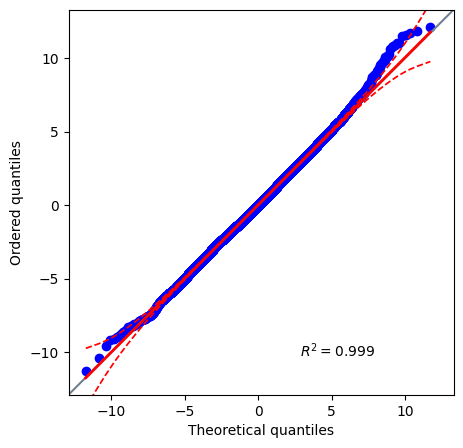

In [ ]:
r_logit = residuo_substituto(resf_logit, df_reg_train.review_score.values, stats.logistic)
df_reg_train['r_logit'] = r_logit
df_reg_train['predicted_logit'] = np.argmax(resf_logit.model.predict(resf_logit.params), axis=1) + 1
mult = np.diag(np.sort(df_reg_train.review_score.unique()))
df_reg_train['expected_logit'] = np.sum(resf_logit.model.predict(resf_logit.params) @ mult, axis=1)
pg.qqplot(r_logit, dist=stats.logistic, confidence=.95)

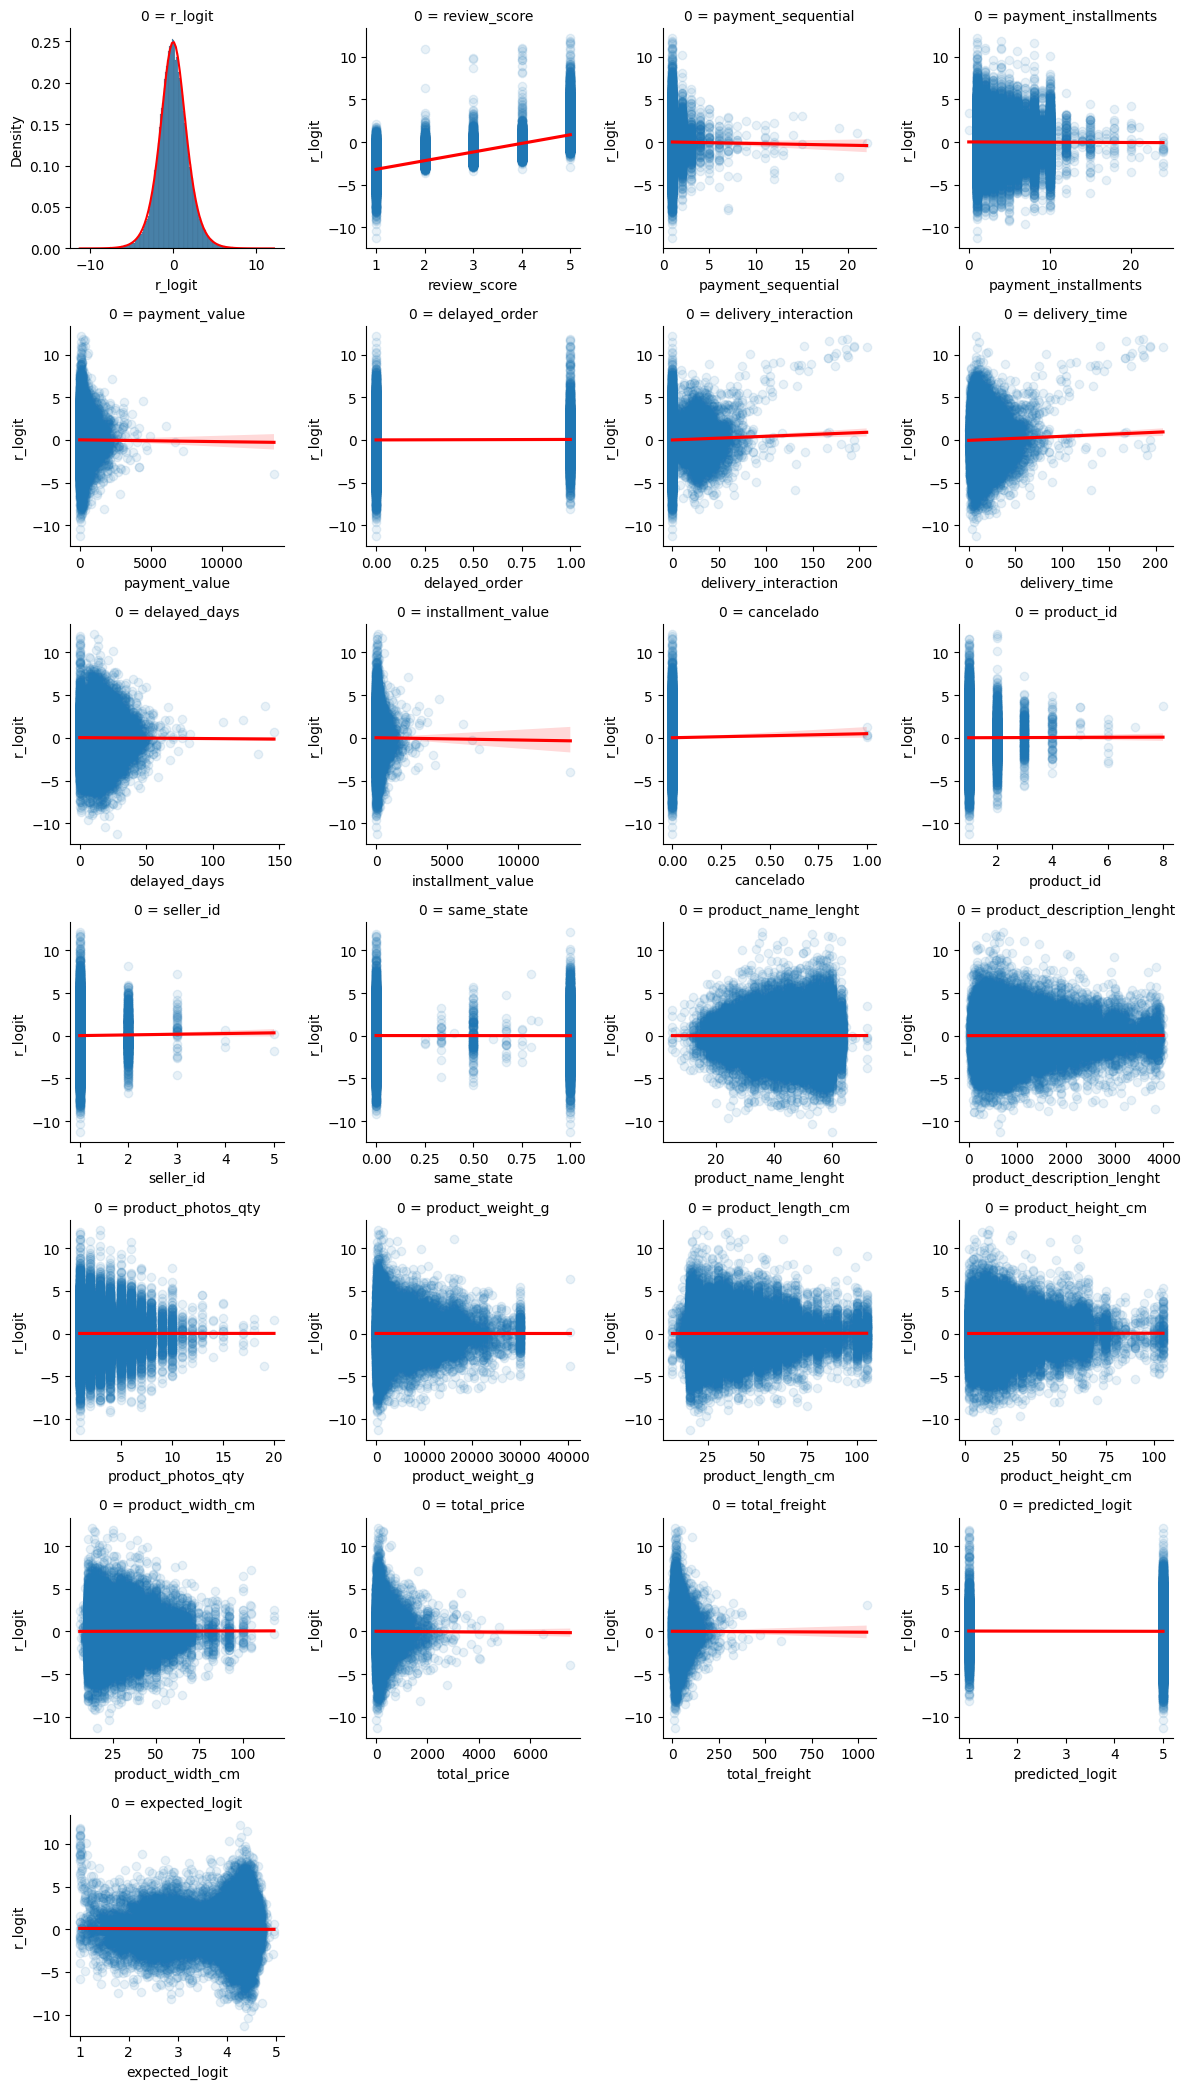

In [ ]:
plota_residuos(df_reg_train, 'r_logit', ['r_logit', 'review_score'] + covariaveis_unicas + ['predicted_logit', 'expected_logit'], stats.logistic)

In [ ]:
reporta_predicoes(resf_logit, df_reg_train.review_score)

MSE de acordo com os valores esperados: 1.33
MSE de acordo com a nota mais provável: 2.00
Acurácia das notas mais provaveis: 61.63%


## Regressão ordinal probit

In [ ]:
modf_probit = OrderedModel(df_reg_train['review_score'], df_reg_train[covariaveis].astype(float),
                                      distr='probit')
resf_probit = modf_probit.fit(method='bfgs')
resf_probit.summary()

/home/lucas/.cache/pypoetry/virtualenvs/ecommerce-classification-xG4A-NiM-py3.10/lib/python3.10/site-packages/scipy/optimize/_optimize.py:1397: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)


         Current function value: 1.095150
         Iterations: 500
         Function evaluations: 510
         Gradient evaluations: 510


/home/lucas/.cache/pypoetry/virtualenvs/ecommerce-classification-xG4A-NiM-py3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:           review_score   Log-Likelihood:                -93659.
Model:                   OrderedModel   AIC:                         1.876e+05
Method:            Maximum Likelihood   BIC:                         1.887e+05
Date:                Tue, 02 Apr 2024                                         
Time:                        03:23:40                                         
No. Observations:               85522                                         
Df Residuals:                   85397                                         
Df Model:                         121                                         
========================================================================================================================================
                                                                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
payment_sequential                                                       0.0065      0.013      0.500      0.617      -0.019       0.032
payment_installments                                                     0.0009      0.002      0.415      0.678      -0.003       0.005
payment_value                                                           -0.0021      0.000    -15.618      0.000      -0.002      -0.002
delayed_order                                                           -0.9224      0.032    -28.873      0.000      -0.985      -0.860
delivery_interaction                                                     0.0044      0.001      3.822      0.000       0.002       0.007
delivery_time                                                           -0.0278      0.001    -31.904      0.000      -0.030      -0.026
delayed_days                                                             0.0014      0.001      2.208      0.027       0.000       0.003
installment_value                                                     7.889e-05   5.29e-05      1.491      0.136   -2.48e-05       0.000
cancelado                                                               -4.6376      5.216     -0.889      0.374     -14.860       5.585
product_id                                                              -0.1707      0.022     -7.590      0.000      -0.215      -0.127
seller_id                                                               -0.7411      0.039    -18.893      0.000      -0.818      -0.664
same_state                                                               0.0005      0.013      0.036      0.972      -0.026       0.027
product_name_lenght                                                     -0.0020      0.000     -4.628      0.000      -0.003      -0.001
product_description_lenght                                            5.788e-06      7e-06      0.827      0.408   -7.93e-06    1.95e-05
product_photos_qty                                                      -0.0042      0.003     -1.677      0.094      -0.009       0.001
product_weight_g                                                     -7.383e-07   1.82e-06     -0.406      0.684    -4.3e-06    2.82e-06
product_length_cm                                                     9.526e-05      0.000      0.282      0.778      -0.001       0.001
product_height_cm                                                       -0.0005      0.000     -1.188      0.235      -0.001       0.000
product_width_cm                                                         0.0003      0.000      0.654      0.513      -0.001       0.001
total_price                                                              0.0022      0.000     15.956      0.000       0.002       0.002
total_freig

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

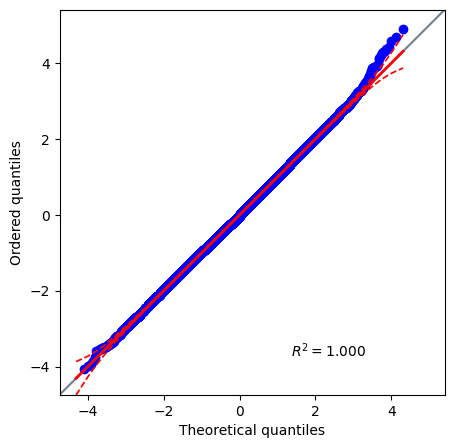

In [ ]:
r_probit = residuo_substituto(resf_probit, df_reg_train.review_score.values, stats.norm)
df_reg_train['r_probit'] = r_probit
df_reg_train['predicted_probit'] = np.argmax(resf_probit.model.predict(resf_probit.params), axis=1) + 1
df_reg_train['expected_probit'] = np.sum(resf_probit.model.predict(resf_probit.params) @ mult, axis=1)
pg.qqplot(r_probit, dist=stats.norm, confidence=.95)

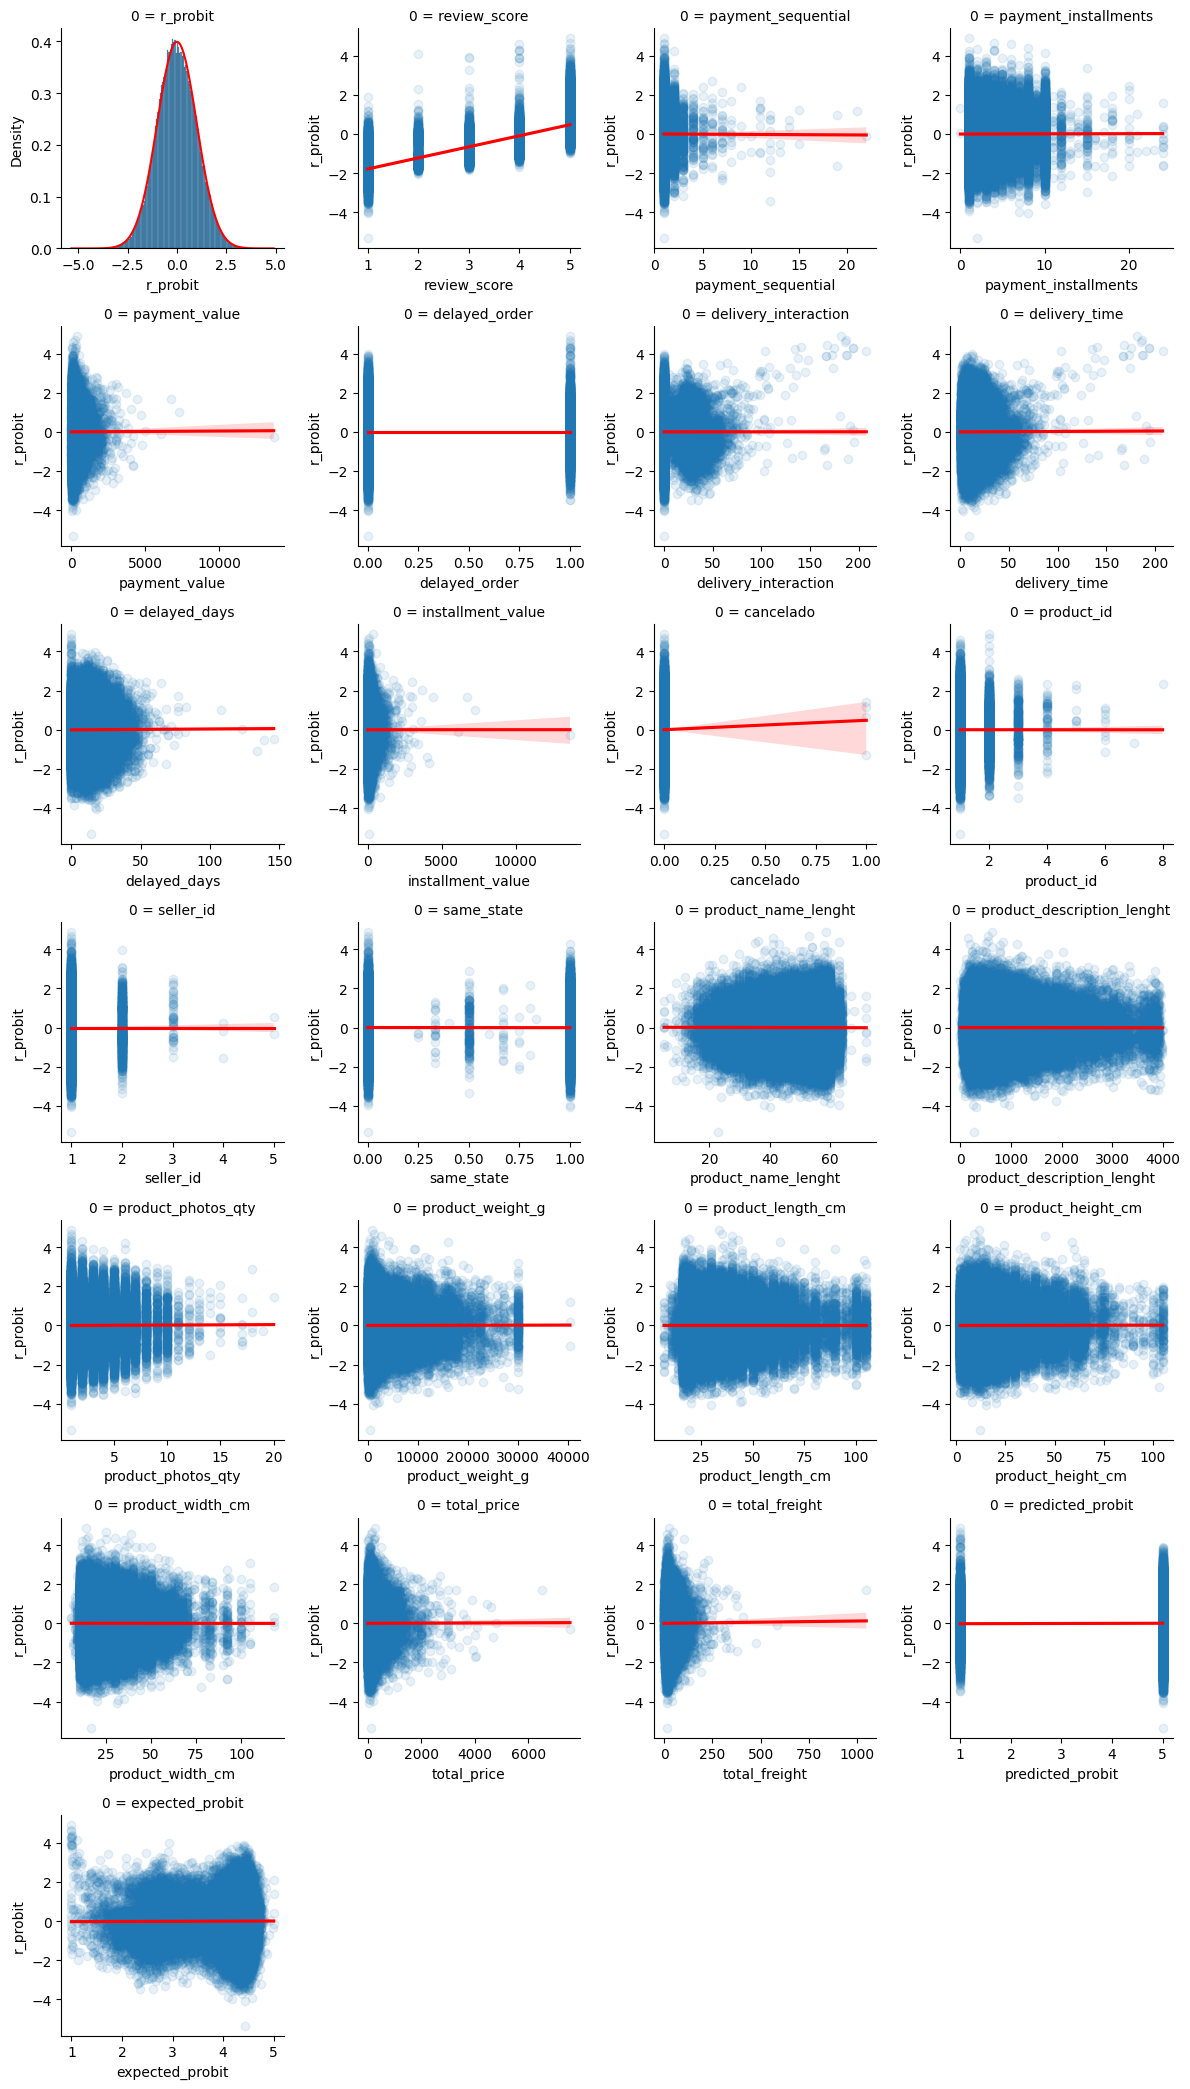

In [ ]:
plota_residuos(df_reg_train, 'r_probit', ['r_probit', 'review_score'] + covariaveis_unicas + ['predicted_probit', 'expected_probit'], stats.norm)

In [ ]:
reporta_predicoes(resf_probit, df_reg_train.review_score)

MSE de acordo com os valores esperados: 1.33
MSE de acordo com a nota mais provável: 2.01
Acurácia das notas mais provaveis: 61.58%


## Regressão ordinal LogLog

In [ ]:
modf_loglog = OrderedModel(df_reg_train['review_score'], df_reg_train[covariaveis].astype(float),
                                      distr=stats.gumbel_r)
resf_loglog = modf_loglog.fit(method='bfgs')
resf_loglog.summary()

/home/lucas/.cache/pypoetry/virtualenvs/ecommerce-classification-xG4A-NiM-py3.10/lib/python3.10/site-packages/scipy/optimize/_optimize.py:1397: OptimizeWarning: Maximum number of iterations has been exceeded.
  res = _minimize_bfgs(f, x0, args, fprime, callback=callback, **opts)


         Current function value: 1.092161
         Iterations: 500
         Function evaluations: 510
         Gradient evaluations: 510


/home/lucas/.cache/pypoetry/virtualenvs/ecommerce-classification-xG4A-NiM-py3.10/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:           review_score   Log-Likelihood:                -93404.
Model:                   OrderedModel   AIC:                         1.871e+05
Method:            Maximum Likelihood   BIC:                         1.882e+05
Date:                Tue, 02 Apr 2024                                         
Time:                        10:18:21                                         
No. Observations:               85522                                         
Df Residuals:                   85397                                         
Df Model:                         121                                         
========================================================================================================================================
                                                                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------
payment_sequential                                                       0.0032      0.012      0.266      0.790      -0.020       0.027
payment_installments                                                    -0.0008      0.002     -0.434      0.664      -0.005       0.003
payment_value                                                           -0.0028      0.000    -17.162      0.000      -0.003      -0.003
delayed_order                                                           -0.4265      0.044     -9.722      0.000      -0.512      -0.341
delivery_interaction                                                    -0.0157      0.002     -9.768      0.000      -0.019      -0.013
delivery_time                                                           -0.0252      0.001    -30.685      0.000      -0.027      -0.024
delayed_days                                                            -0.0001      0.001     -0.249      0.803      -0.001       0.001
installment_value                                                     8.042e-05   4.87e-05      1.653      0.098   -1.49e-05       0.000
cancelado                                                               -4.9147      3.693     -1.331      0.183     -12.154       2.324
product_id                                                              -0.1968      0.024     -8.282      0.000      -0.243      -0.150
seller_id                                                               -0.6743      0.043    -15.647      0.000      -0.759      -0.590
same_state                                                              -0.0288      0.012     -2.349      0.019      -0.053      -0.005
product_name_lenght                                                     -0.0017      0.000     -4.387      0.000      -0.002      -0.001
product_description_lenght                                            6.975e-06   6.38e-06      1.093      0.275   -5.54e-06    1.95e-05
product_photos_qty                                                      -0.0041      0.002     -1.786      0.074      -0.009       0.000
product_weight_g                                                     -1.276e-06   1.68e-06     -0.760      0.447   -4.57e-06    2.02e-06
product_length_cm                                                        0.0004      0.000      1.412      0.158      -0.000       0.001
product_height_cm                                                       -0.0004      0.000     -0.970      0.332      -0.001       0.000
product_width_cm                                                         0.0004      0.000      0.969      0.333      -0.000       0.001
total_price                                                              0.0029      0.000     17.505      0.000       0.003       0.003
total_freig

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

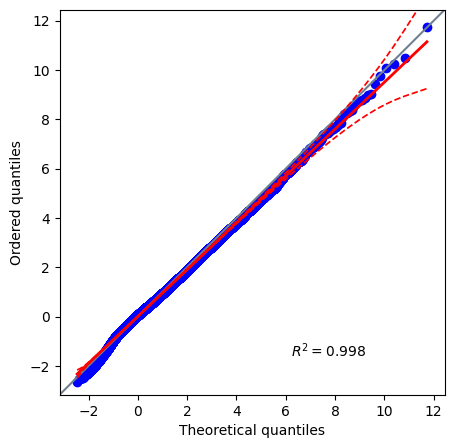

In [ ]:
r_loglog = residuo_substituto(resf_loglog, df_reg_train.review_score.values, stats.gumbel_r)
df_reg_train['r_loglog'] = r_loglog
df_reg_train['predicted_loglog'] = np.argmax(resf_loglog.model.predict(resf_loglog.params), axis=1) + 1
df_reg_train['expected_loglog'] = np.sum(resf_loglog.model.predict(resf_loglog.params) @ mult, axis=1)
pg.qqplot(r_loglog, dist=stats.gumbel_r, confidence=.95)

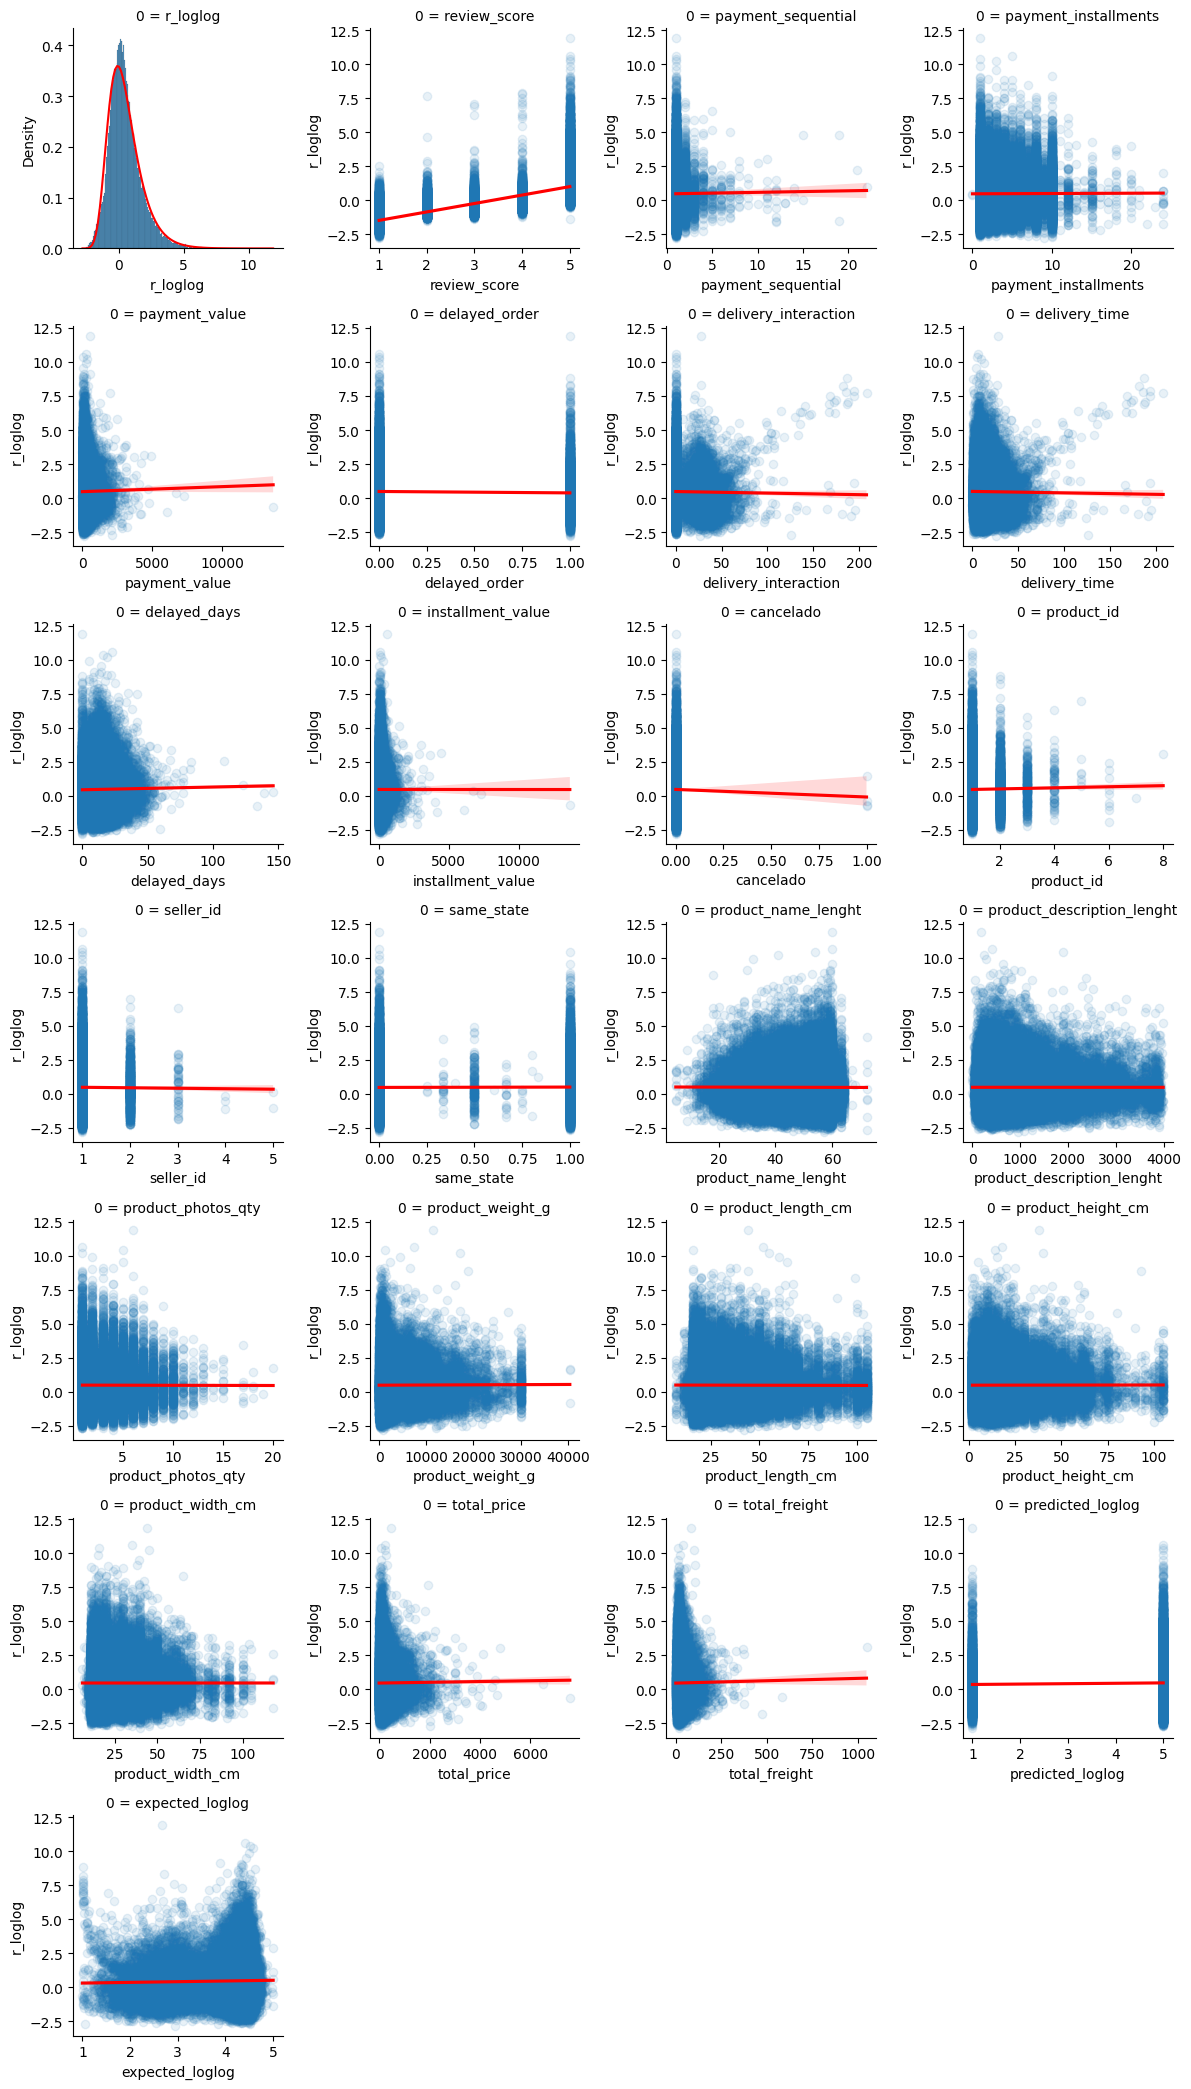

In [ ]:
plota_residuos(df_reg_train, 'r_loglog', ['r_loglog', 'review_score'] + covariaveis_unicas + ['predicted_loglog', 'expected_loglog'], stats.gumbel_r)

In [ ]:
reporta_predicoes(resf_loglog, df_reg_train.review_score)

MSE de acordo com os valores esperados: 1.32
MSE de acordo com a nota mais provável: 1.99
Acurácia das notas mais provaveis: 61.64%


In [ ]:
r_probit.mean(), r_logit.mean(), r_loglog.mean()

(-0.0007963687629919248, 0.015365549142877034, 0.475517297550056)

Apesar das métricas de previsão melhores para a regressão loglog, o seu resíduo tem valor distante de 0, indicando um ajuste não tão bom

## Teste Regressão ordinal logit

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

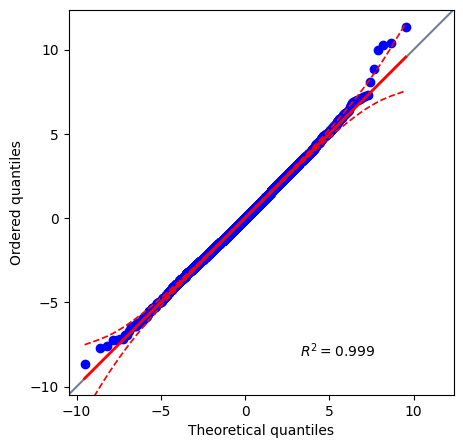

In [ ]:
probs_preditas_logit = resf_logit.model.predict(resf_logit.params, exog=df_reg_test[covariaveis].astype(float))
df_reg_test['predicted_logit'] = np.argmax(probs_preditas_logit, axis=1) + 1
df_reg_test['expected_logit'] = np.sum(probs_preditas_logit @ mult, axis=1)
r_probit = residuo_substituto(resf_probit, df_reg_test.review_score.values, stats.logistic, new_data=df_reg_test[covariaveis].astype(float))
df_reg_test['r_logit'] = r_logit
pg.qqplot(r_logit, dist=stats.logistic, confidence=.95)

In [ ]:
reporta_predicoes(resf_logit, df_reg_test.review_score, exog=df_reg_test[covariaveis].astype(float))

MSE de acordo com os valores esperados: 1.35
MSE de acordo com a nota mais provável: 2.05
Acurácia das notas mais provaveis: 61.09%


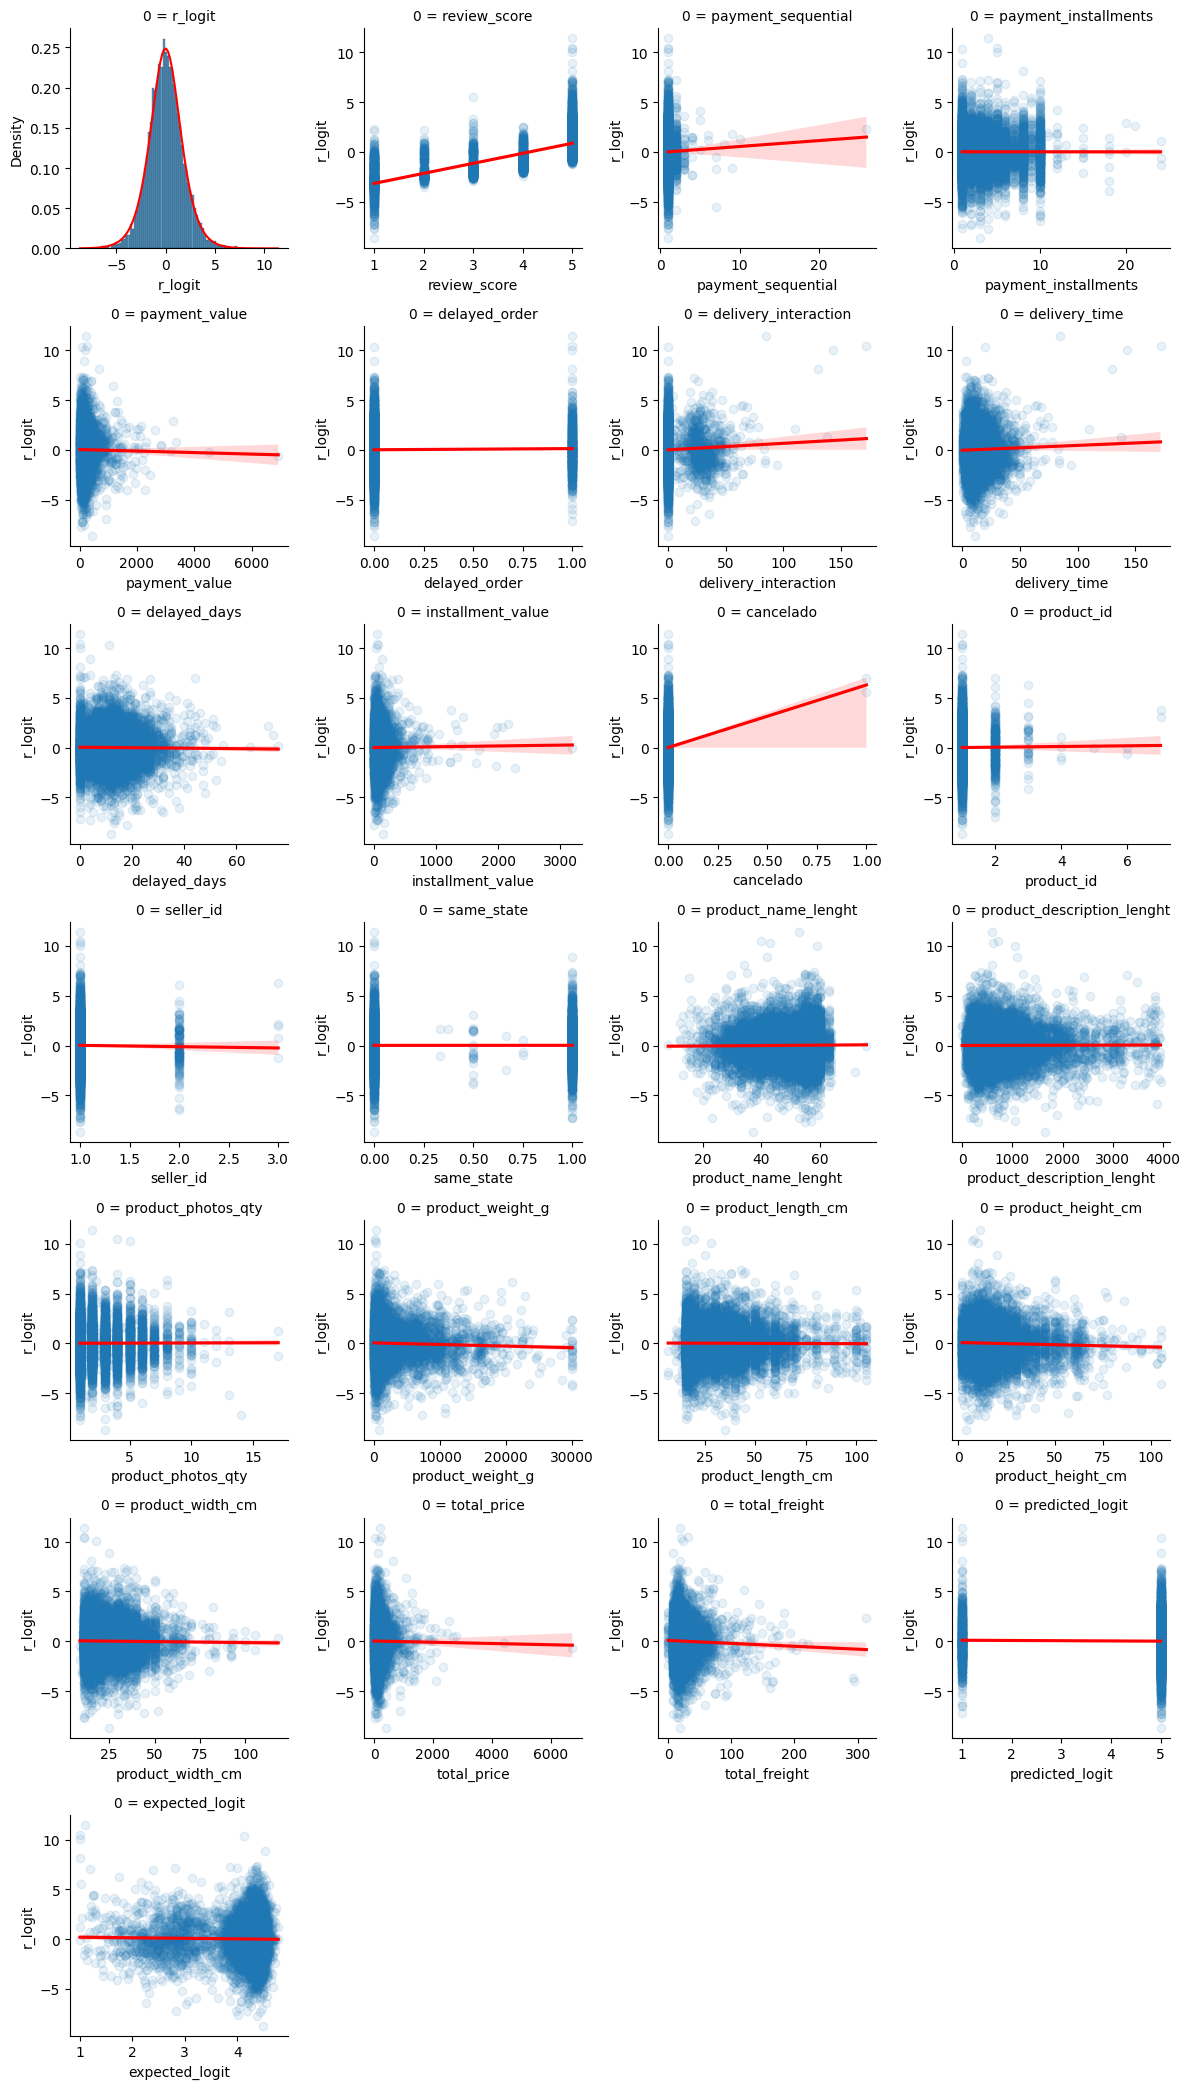

In [ ]:
plota_residuos(df_reg_test, 'r_logit', ['r_logit', 'review_score'] + covariaveis_unicas + ['predicted_logit', 'expected_logit'], stats.logistic)

## Random Forest

In [ ]:
clf = ensemble.RandomForestClassifier()
param_grid = {
    'max_depth': range(1, 11),
    'min_samples_split': range(2, 5),
    'min_samples_leaf': range(1, 5),
    'n_estimators': range(150, 200, 20)
}

grid = model_selection.GridSearchCV(clf, param_grid)
grid.fit(df_reg_train[covariaveis], df_reg_train['review_score'])

# Obtém predições para a base de teste
predito = grid.predict(df_reg_test[covariaveis])
print(f'melhores parametros: {grid.best_params_}')
print(f"Acurácia do modelo de floresta aleatória: {metrics.accuracy_score(df_reg_test['review_score'], predito):.2f}")

melhores parametros: {'max_depth': 10, 'min_damples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Acurácia do modelo de floresta aleatória: 0.62


## Naive-Bayes

In [ ]:
# Cria um classificador Bayes ingênuo (Naive Bayes)
gnb = naive_bayes.GaussianNB()

# Treina o classificador na base de treinamento
gnb.fit(df_reg_train[covariaveis], df_reg_train['review_score'])

# Predição dos rótulos na base de teste
predito = gnb.predict(df_reg_test[covariaveis])


print(f"Acurácia do modelo de Naive-Bayes: {metrics.accuracy_score(df_reg_test['review_score'], predito):.2f}")

Acurácia do modelo de Naive-Bayes: 0.57


## KNN

In [ ]:
classifier = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(),
                                          {'n_neighbors': range(3, 10)},
                                          scoring='accuracy')

# treina o classificador com os dados de treinameto
classifier.fit(df_reg_train[covariaveis], df_reg_train['review_score'])

# Obtém predições para a base de teste
predito = classifier.predict(df_reg_test[covariaveis])
print(f'melhores parametros: {classifier.best_params_}')
print(f"Acurácia do modelo de KNN {metrics.accuracy_score(df_reg_test['review_score'], predito):.2f}")

melhores parametros: {'n_neighbors': 9}
Acurácia do modelo de KNN 0.55
